## Homework #6 Final project report and code
#### Author: `Kate Luchka`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)
df_new = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
data = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
low_memory=False

#### Merging datasets:

In [67]:
a = df
b = df_meta
b = b.dropna(axis=1)
merged = a.merge(b, on='dialog_id')

In [68]:
merged.head(5)

,id,date,from_id,to_id,fwd_from,message,type_x,duration,dialog_id,name,type_y,users
0,219,2021-10-24 15:35:31+00:00,PeerUser(user_id=600188849),PeerChannel(channel_id=1154285538),NaN,NaN,photo,NaN,-1001154285538,Фемілі🤗,Group,"{'user_id': 559072245, 'first_name': 'Катя', '..."
1,218,2021-10-13 09:32:16+00:00,PeerUser(user_id=582254992),PeerChannel(channel_id=1154285538),NaN,NaN,photo,NaN,-1001154285538,Фемілі🤗,Group,"{'user_id': 559072245, 'first_name': 'Катя', '..."
2,217,2021-10-12 09:06:29+00:00,PeerUser(user_id=600188849),PeerChannel(channel_id=1154285538),NaN,Дійсно,text,NaN,-1001154285538,Фемілі🤗,Group,"{'user_id': 559072245, 'first_name': 'Катя', '..."
3,216,2021-10-12 09:06:25+00:00,PeerUser(user_id=600188849),PeerChannel(channel_id=1154285538),NaN,NaN,photo,NaN,-1001154285538,Фемілі🤗,Group,"{'user_id': 559072245, 'first_name': 'Катя', '..."
4,215,2021-10-12 09:02:59+00:00,PeerUser(user_id=582254992),PeerChannel(channel_id=1154285538),NaN,NaN,photo,NaN,-1001154285538,Фемілі🤗,Group,"{'user_id': 559072245, 'first_name': 'Катя', '..."


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## ✔
### ☞ Which words are used most often? 
### ☞ What is the frequency of those words?
#### `Hypothesis: These words would be connectors, pronoun (especially 'I'); calling different telegram bots (their names) and (obviously) curse words.`
#### I won't use any additional filters, stopwords intentionally here to observe all situation

In [4]:
text = df[(df["type"]=="text")].dropna(how='all')
comm_word = text[['message','dialog_id']]

In [5]:
from collections import Counter
a = comm_word.applymap(str)
d = Counter(" ".join(a["message"]).lower().split())
fr = pd.DataFrame.from_dict(d, orient='index').reset_index()
fr.columns.values[1] = 'count'
fr = fr.sort_values(by='count',ascending=False)
fr.head(10)

,index,count
176,не,52692
71,в,48159
2494,я,46019
109,на,38077
273,а,30418
4882,и,28599
181,у,19543
47,і,17210
15704,что,17106
631,так,15864


### ☞ What will be visual representation of most frequent words?
### I'll use wordcloud to solve this problem

In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

comm_word['message'].to_csv(r'C:\Users\Kate\tgProject\telegram-dialogs-analysis-v2-main\wordcloud.txt', header=None, index=None, sep='\t', mode='a')
TXT_FILE = Path.cwd() / "wordcloud.txt"

text = open(TXT_FILE, mode="r", encoding="utf-8").read()
stopwords = STOPWORDS


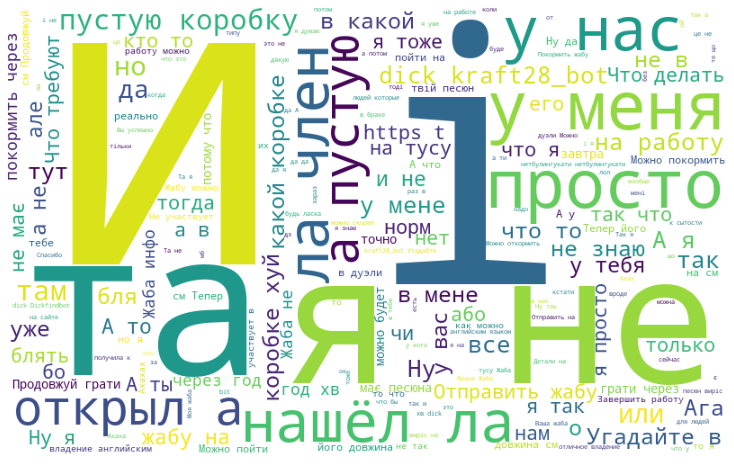

In [7]:
wc = WordCloud(background_color="white", stopwords=stopwords, height=500, width=800)
wc.generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### I wanted to find more creative approach to solve this problem. So I depicted wordcloud in `the shape of telegram icon`

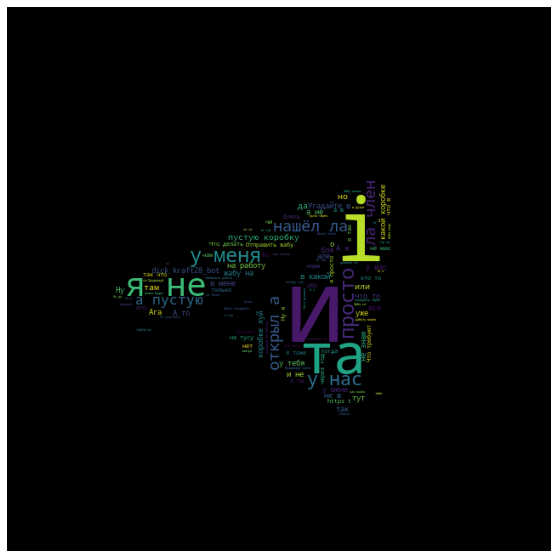

In [8]:
from PIL import Image
mask = np.array(Image.open('image2.jpg'))
mwc  = WordCloud(background_color='black', mask = mask)
mwc.generate(text)

plt.figure(figsize = (10, 10)) 
plt.imshow(mwc) 
plt.axis("off")  
  
plt.show() 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## ✔
### ☞ How many messages I sent and received per hour during all time? 
### ☞ Which hours are the most busy (according to number of messages) and which hours are mostly free from communicating?
### ☞ What is the workday of avarage telegram user (when it starts and ends?)
#### `Hypothesis: the most busy hours are working hours (from 8 am to 6 pm), and evening hours (chatting and burning deadlines); night hours (2 am - 5 am) are mostly free because usually most people are sleeping at this time`

In [9]:
time_data = df_new.copy()
time_data['date'] = pd.to_datetime(time_data['date']) 
time_data['date'] = time_data['date'].dt.strftime('%H')
time_data = time_data.groupby(['date']).size().reset_index(name='count')
time_data.rename(columns = {'date':'Hour', 'count':'Number_of_Messages'}, inplace = True)
time_data

,Hour,Number_of_Messages
0,00,4388
1,01,1449
2,02,2028
3,03,1577
4,04,1971
5,05,5086
6,06,12049
7,07,25423
8,08,46406
9,09,41394


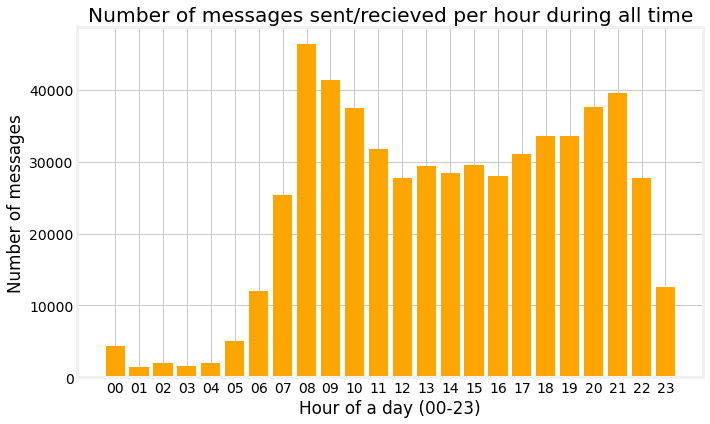

In [10]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
 
ax.bar(time_data.Hour, time_data.Number_of_Messages, color='orange')
ax.set_xticklabels(time_data.Hour)
plt.xlabel("Hour of a day (00-23)")
plt.ylabel("Number of messages")
plt.title('Number of messages sent/recieved per hour during all time')
ax.set_facecolor('white')

### ☞ How many messages I sent and received per hour during all time?
### Separately received and sent

In [192]:
hour_df = df_new.copy()
hour_df['date'] = pd.to_datetime(hour_df['date']) 
hour_df['date'] = hour_df['date'].dt.strftime('%H')
hour_df['sended'] = np.where(hour_df['from_id'] == "PeerUser(user_id=559072245)", 1, 0)
hour_df['recieved'] = 1-hour_df['sended']
hour_df = hour_df.groupby('date', as_index=False)[['sended', 'recieved']].sum()
hour_df.rename(columns = {'date':'Hour'}, inplace = True)
hour_df

,Hour,sended,recieved
0,00,298,4090
1,01,41,1408
2,02,3,2025
3,03,2,1575
4,04,14,1957
5,05,254,4832
6,06,784,11265
7,07,1793,23630
8,08,3321,43085
9,09,2605,38789


In [216]:
fig = go.Figure()

fig.add_trace(go.Line(
    name='received',
    x=hour_df['Hour'],
    y=hour_df['recieved']
))

fig.add_trace(go.Line(
    name='sended',
    x=hour_df['Hour'],
    y=hour_df['sended']
))
fig.update_layout(
    title="Number of messages sent/recieved per hour during all time",
    xaxis_title="Hour of a day (00-23)",
    yaxis_title="Number of messages",
)
fig.show()

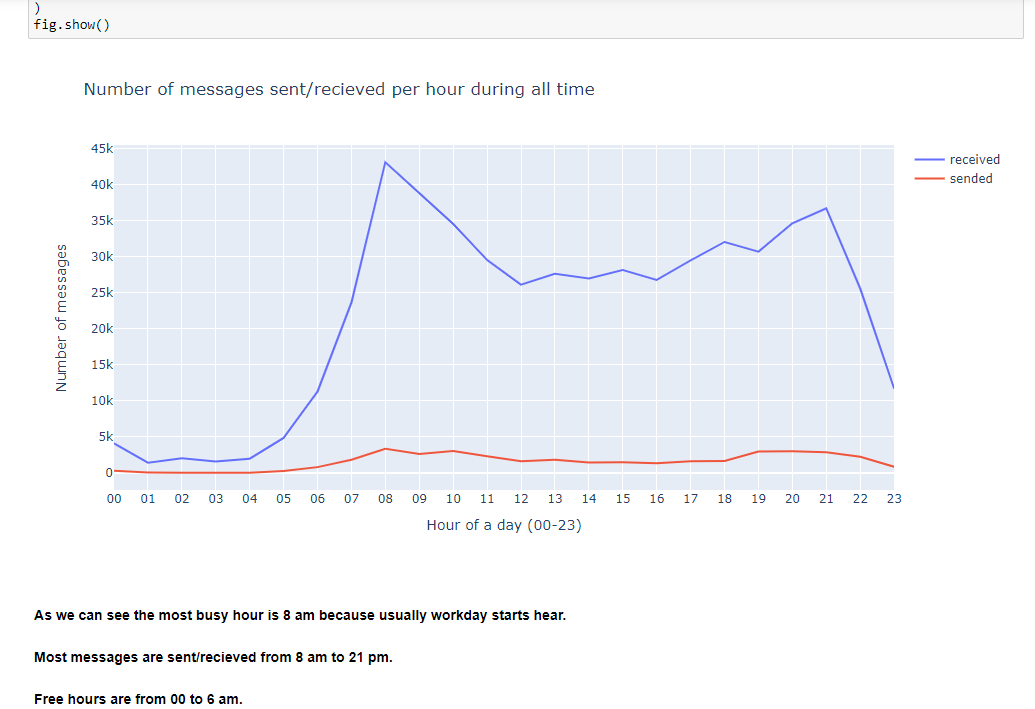

#### As we can see the most busy hour is 8 am because usually workday starts hear.
#### Most messages are sent/recieved from 8 am to 21 pm.
#### Free hours are from 00 to 6 am.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### ☞ How many messages I sent and received per day during all time? 
### ☞ Which days of the week are the most busy (according to number of messages) and which ones are mostly free from communicating?
### ☞ Are weekdays more busy than weekends? (according to the number of messages)
#### `Hypothesis: weekdays (from Monday to Friday) are most busy, especially Monday (as the first day of week after weekends). The most free day from messages is Sunday because this day people usually tend to have a break and relax.`

In [11]:
from datetime import date
import calendar
from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data = df_new.copy()

day_data['date'] = pd.to_datetime(day_data['date'])
day_data['day_of_week'] = day_data['date'].dt.day_name()
day_data = day_data.groupby(['day_of_week']).size().reset_index(name='count')
day_data.rename(columns = {'day_of_week':'Weekday', 'count' : 'Number_of_Messages'}, inplace = True)
day_data = day_data.groupby(['Weekday']).sum().reindex(cats)

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

day_data['Day_id'] = day_data.index
day_data['Day_id'] = day_data['Day_id'].map(sorterIndex)
day_data.sort_values('Day_id', inplace=True)
day_data

,Number_of_Messages,Day_id
Weekday,,
Sunday,64683,0
Monday,87859,1
Tuesday,85791,2
Wednesday,84590,3
Thursday,98641,4
Friday,94270,5
Saturday,54267,6


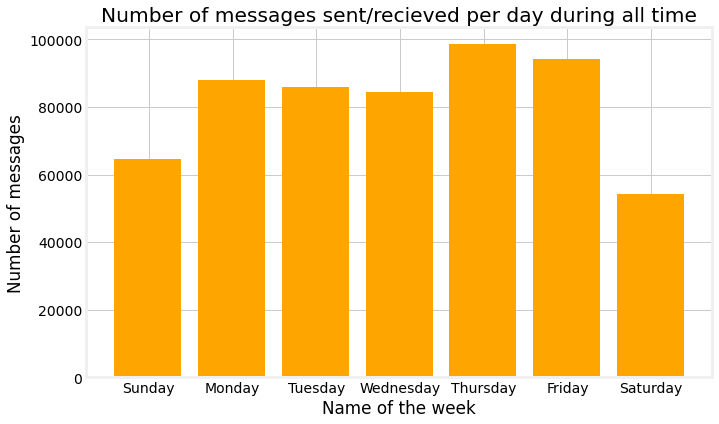

In [12]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
 
ax.bar(day_data.Day_id, day_data.Number_of_Messages, color='orange')
ax.set_xticks([x+0.01 for x in day_data.Day_id])
ax.set_xticklabels(day_data.index)
plt.xlabel("Name of the week")
plt.ylabel("Number of messages")
plt.title('Number of messages sent/recieved per day during all time')
ax.set_facecolor('white')

#### The most busy are weekdays (because of the studying/work messages)
#### The most busy days (according to number of messages) are Thursday and Friday (I guess, it's because of the end of working week, so people tend to solve all their problems till weekdays)
#### The most free day from communicating is Saturday (maybe because it's the first day of weekend and there are a lot of deadlines till Monday, thus Sunday is more busy for communicating)

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## ✔
### ☞ What is the ratio of messages types?
### ☞ Which type of messages is most common? 
### ☞ Which one is used the least?
#### `Hypothesis: text messages predominate the most. Because it's the best way to give information (and some people tend to write 1 word or symbol per message). Video type is used the less due to the inconvenience of viewing.`

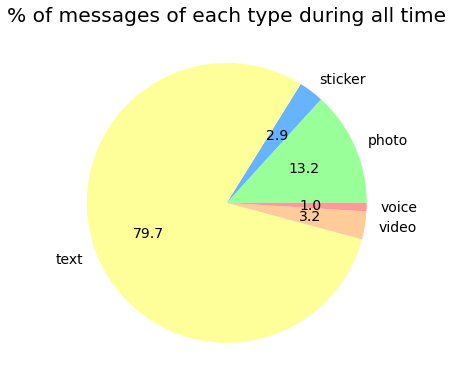

In [13]:
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
colors = ['#99ff99','#66b3ff','#ffff99','#ffcc99', '#ff9999']
ax = df_new.groupby(["type"])["type"].count().plot.pie(autopct='%0.1f', colors = colors)
plt.title('% of messages of each type during all time')
ax.set_facecolor('white')
ax.axes.get_yaxis().set_visible(False)
#autopct='%0.1f'

#### The most popular type of messages is text.
#### However, the least used one is voice. Maybe, it's because people like more to listen and see the picture not only the voice.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## ✔
### ☞ How many messages I sent per hour during all time? 
### ☞ When I'm most active and when I tend to have a break?
### ☞ What is my timetable like?
#### `Hypothesis: the most busy hours are work hours (from 8 am to 5 am), evening hours (because of chatting and burning deadlines); night hours (2 am - 5 am) are mostly free because usually I don't chat much during this time`

In [14]:
my_messages = df_new[(df_new["from_id"] == "PeerUser(user_id=559072245)") | (df_new['to_id'] == 559072245)]
my_messages['sended'] = np.where(my_messages['from_id'] == "PeerUser(user_id=559072245)", 1, 0)
stat = my_messages.groupby('date', as_index=False)[['sended']].sum()


time_data = stat.copy()
time_data['date'] = pd.to_datetime(time_data['date']) 
time_data['date'] = time_data['date'].dt.strftime('%H')
time_data = time_data.groupby(['date']).size().reset_index(name='count')
time_data.rename(columns = {'date':'Hour', 'count':'Number_of_Messages'}, inplace = True)
time_data

,Hour,Number_of_Messages
0,00,672
1,01,85
2,02,14
3,03,55
4,04,41
5,05,609
6,06,1264
7,07,2865
8,08,4678
9,09,3906


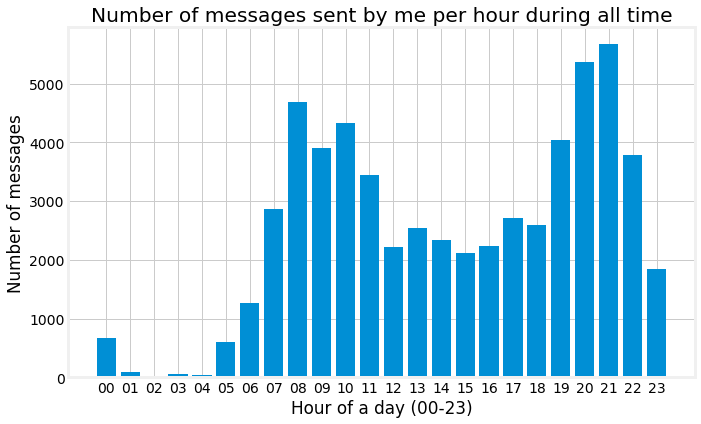

In [15]:
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
 
ax.bar(time_data.Hour, time_data.Number_of_Messages)
ax.set_xticklabels(time_data.Hour)
plt.xlabel("Hour of a day (00-23)")
plt.ylabel("Number of messages")
plt.title('Number of messages sent by me per hour during all time')
ax.set_facecolor('white')

#### So, I'm most active in evening hours when I just chat or discuss the deadlines with other people. 
#### (Schedule according to the visual data) Usually I'm sleeping from 00 to 5-6 am. My day starts around 7 am. My study day starts at 8 am and is most productive till 11 am. Than I have less communicating till evening which is most busy time during the day. This time I'm usually at home, chatting and collaborating with other people. After 21 pm number of messages is declining (till 1 am). 
#### So, this schedule is pretty simular to the one I have in real life.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### ✔ Working with the semantics of words

In [16]:
PATH = "C:/Users/Kate/tgProject/telegram-dialogs-analysis-v2-main/tone-ua.csv"
dicto= pd.read_csv(PATH ,encoding='windows-1251')

In [18]:
tonality_dict = dicto.set_index('term').T.to_dict('list')

In [30]:
import simplemma
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
langdata = simplemma.load_data('uk')

def preprocess_text(text):
    #token = [word_tokenize(i.lower()) for i in text]
    tokens = word_tokenize(text.lower()) 
    tokens = [token for token in tokens if 
               token != " " \
              and token.strip() not in punctuation]
    return [simplemma.lemmatize(t, langdata) for t in tokens]

In [33]:
preprocess_tag = [preprocess_text(str(i)) for i in data['message']]
data["preprocess_text"] = preprocess_tag

In [34]:
data['total_len'] = data["preprocess_text"].map(lambda x: len(x))

In [38]:
from utils.date import get_day_and_hour, get_week_day_from_number

In [39]:
def calculate_msg_sentiment(msg):
    """
    Calculate dictionary-base sentiment of a particular message.
    Return average sentiment of a message.
        
    """

   # tokenized_msg = msg.split()
   # print(tokenized_msg)
    #print('hello')
    overall_sentiment = 0
    words_num = 0
    for line in msg:
        tokenized_msg = line.split(",")

        token_sentiment = tonality_dict.get(line, 0)
        if token_sentiment!= 0:
            overall_sentiment += token_sentiment[2]
            words_num += 1
    if words_num == 0:
        return 0
    avg_sentiment = overall_sentiment / words_num

    return avg_sentiment


def add_dialog_sentiment(data):
    """
    Add sentiment for each message in a dialog,
    and add it in a new column for a particular message,
    return new dataframe

    Supported languages: eng, ru, ua
    """
    data['sentiment'] = data.apply(lambda x: calculate_msg_sentiment(x['preprocess_text']),axis=1)

    return data

def calculate_avg_subdialog_sentiment(data):
    """
    Calculate average sentiment for each subdialog in a dataframe,
    save results in a new column and return an updated dataframe.
    """
    grouped_data = sentiment_data_for_each_msg.groupby(
        [sentiment_data_for_each_msg['from_id'].fillna('-'),
         sentiment_data_for_each_msg['id']])
    data['avg_subdialog_sentiment'] = grouped_data['sentiment'].transform(lambda x: round(x.mean(), 3))

    return data


def add_hour_and_dayoweek(data):
    """
    Add hour and day of the week column to a dataframe

    Return updated dataframe
    """
    data[['hour_of_day', 'day_of_week']] = data.apply(lambda x: get_day_and_hour(x['date']),
                                                      axis=1,
                                                      result_type="expand")

    return data

def analyze_sentiment_for_hour_and_dayoweek(data_with_hour_and_week):
    """
    Calculate sentiment by day of the week and hour
    for each user.

    Sentiment for a particular message is the average sentiment
    for a message in a particular dialog and subdialog

    Return a dataframe ready for visualization
    """
    grouped_by_date = data_with_hour_and_week.groupby(['from_id', 'day_of_week', 'hour_of_day'])
    finalized_data = round(grouped_by_date['avg_subdialog_sentiment'].mean(), 3).reset_index()
    return finalized_data

In [40]:
# This adds 'sentiment' column to a df
sentiment_data_for_each_msg = add_dialog_sentiment(data)

# This adds 'avg_subdialog_sentiment' column to a df
avg_sentiment_data = calculate_avg_subdialog_sentiment(sentiment_data_for_each_msg)

In [41]:
# This adds 'hour_of_day' and 'day_of_week' columns to a df
data_with_hour_and_week = add_hour_and_dayoweek(avg_sentiment_data)

# This combines data for a specific day of a week and hour, ready to be visualized
final_sentiment_data = analyze_sentiment_for_hour_and_dayoweek(data_with_hour_and_week)

In [59]:
USER_ID = 559072245

## ✔ 
### ☞ What is the sentiment of messages per hour dusing the week? (of specific user)
### ☞ Does this user use more positive/neutral or negative words in their messages?
### ☞ What is the overall mood of the specific user?

In [75]:
final_sentiment_data.head()

,from_id,day_of_week,hour_of_day,avg_subdialog_sentiment
0,PeerChannel(channel_id=1248279813),1,7,0.227
1,PeerChannel(channel_id=1248279813),1,9,0.203
2,PeerChannel(channel_id=1248279813),1,11,0.168
3,PeerChannel(channel_id=1248279813),1,14,0.372
4,PeerChannel(channel_id=1248279813),1,18,0.000


In [72]:
def visualize_user_sentiment(sentiment_data, user_id):
    """
    Visualize sentiment data for a specific user
    in a timeline (linear graph), starting at 00:00 on Monday,
    finishing at 23:59 on Sunday    """

    user_sent_data = sentiment_data[sentiment_data['from_id'] == "PeerChannel(channel_id=1248279813)"]

    fig = make_subplots(rows=7, cols=1,
                   subplot_titles=("Monday", "Tuesday", "Wednesday", "Thursday",
                                   "Friday", "Saturday", "Sunday"),
                   shared_yaxes=True,
                   shared_xaxes=True,
                   x_title="Hours",
                   y_title="Sentiment",
                   horizontal_spacing=0.005,

                    )



    fig.update_layout(title_text=f"Weekly sentiment analysis for PeerChannel(channel_id=1248279813)", height=1050, showlegend=False)
    for day_of_week in range(1, 8):
        day_of_week_data = user_sent_data.query(f'day_of_week == {day_of_week}')
        hourly_data = dict(zip(day_of_week_data.hour_of_day, day_of_week_data.avg_subdialog_sentiment))
        hourly_data_dict = {hour : 0 for hour in range(24)}
        hourly_data_dict.update(hourly_data)

        fig.add_scatter(x=list(hourly_data_dict.keys()),
                        y=list(hourly_data_dict.values()),
                        name=get_week_day_from_number(day_of_week),
                        row=day_of_week, col=1,
                       )

        fig.update_yaxes(range=[-0.5, 0.5], row=day_of_week, col=1)

    fig.layout.annotations[0].update(x=0.055, y=0.965)
    fig.layout.annotations[1].update(x=0.055, y=0.81)
    fig.layout.annotations[2].update(x=0.068, y=0.66)
    fig.layout.annotations[3].update(x=0.055, y=0.51)
    fig.layout.annotations[4].update(x=0.045, y=0.355)
    fig.layout.annotations[5].update(x=0.055, y=0.2)
    fig.layout.annotations[6].update(x=0.045, y=0.05)


    fig.show()


visualize_user_sentiment(final_sentiment_data, USER_ID)

### !! I don't know why but this graph doesn't show when I downlode the file (so I put screenshots of it below)

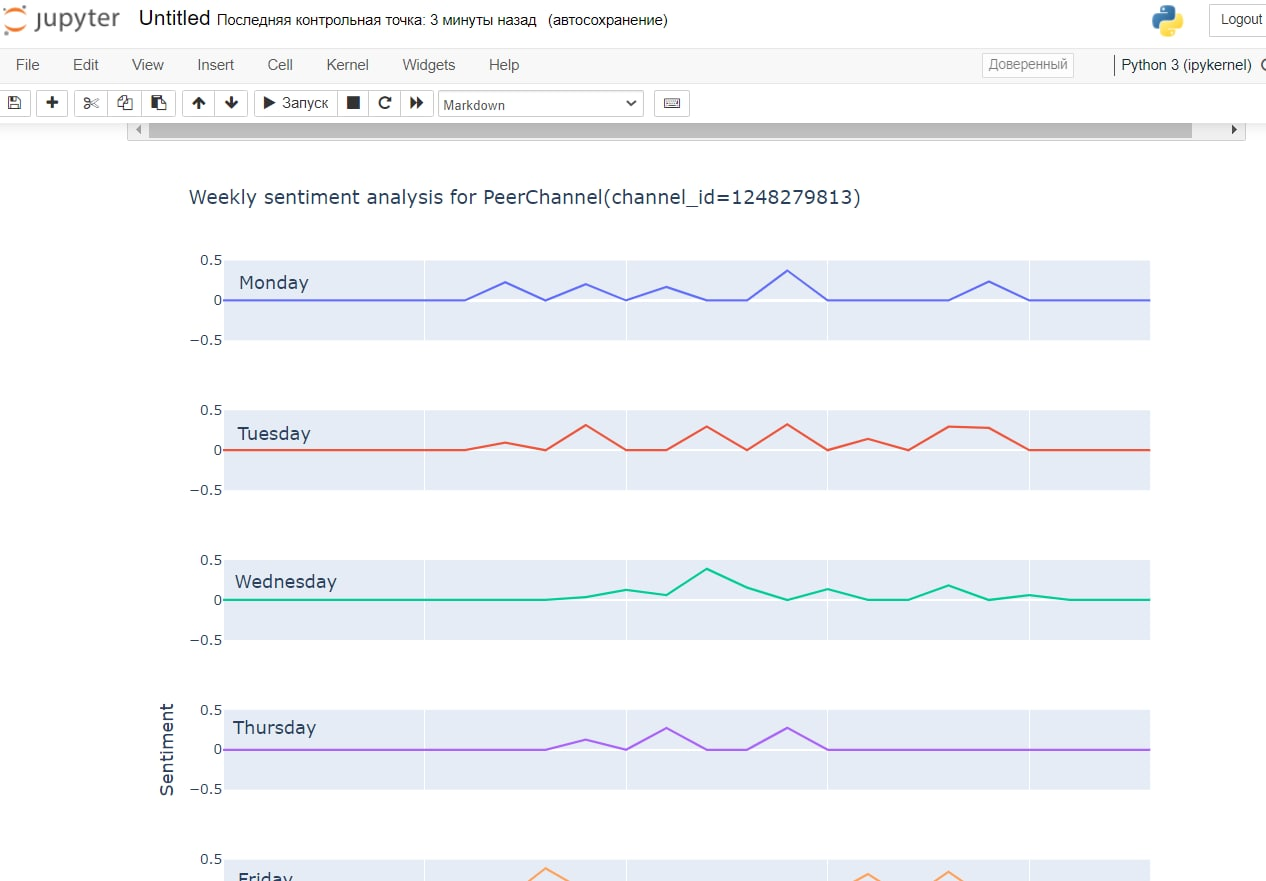

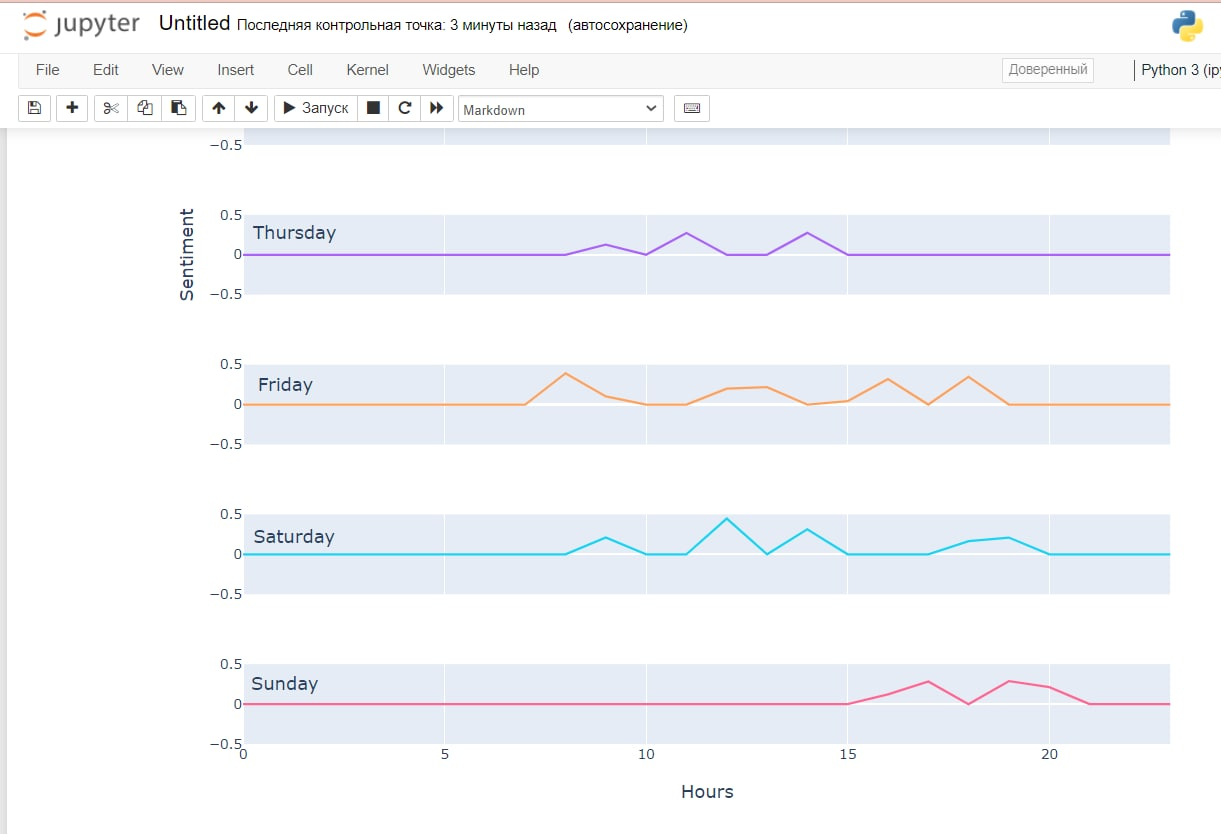

#### I used the id of channel for important info of my speciality. As we can see the messages from the channel are positive/neutral energy (because it's used to convey important info)
#### Acoording to this visualisation we receive important messages during the working day (if it's a weekday) and mostly during evening if it's a weekday.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### ☞ What is the average sentiment per dialog?
### ☞ Do dialogs have more 'positive' or 'negative' energy according to the overall sentiment?
#### `Hypothesis: Dialogs have mostly positive sentiment because (I hope) people tend to give and receive more positive messages`

In [241]:
data_per_id = data.copy()
sentiment_per_id = data.copy()

In [242]:
data_per_id = data_per_id.groupby(['dialog_id']).size().reset_index(name='count')
sentiment_per_id = sentiment_per_id.groupby('dialog_id')['sentiment'].sum()

In [243]:
sentiment_per_id = pd.DataFrame(sentiment_per_id)
sentiment_per_id.head()
sentiment_per_id["result"] = sentiment_per_id["sentiment"].div(data_per_id["count"].values)
sentiment_per_id

,sentiment,result
dialog_id,,
-1001787503050,22.828510,0.191836
-1001761570307,0.000000,0.000000
-1001650358448,1498.386685,0.084861
-1001614610308,2402.602491,0.084566
-1001603402510,1.278600,0.009760
...,...,...
1859205513,0.000000,0.000000
2043038625,0.000000,0.000000
5005476282,23.388154,0.206975


In [305]:
final = sentiment_per_id.merge(data_per_id, on="dialog_id")
for ind in final.index:
    if (final["result"][ind] == 0):
        final["result"][ind] = -1 / final["count"][ind]  
final = final.drop(final[final.result == -1.0].index)

In [270]:
final_merged = final.merge(df_meta, on='dialog_id')
merged = a.merge(b, on='dialog_id')

,dialog_id,sentiment,result,count,name,type,users
0,653149110,1.579867,0.789933,2,thegreatpretender,Private dialog,"{'user_id': 653149110, 'first_name': 'thegreat..."
1,392408312,1.300753,0.433584,3,Alina Voronina,Private dialog,"{'user_id': 392408312, 'first_name': 'Alina', ..."
2,564262388,5.318493,0.409115,13,Andriana P,Private dialog,"{'user_id': 564262388, 'first_name': 'Andriana..."
3,280169349,2.037530,0.407506,5,T,Private dialog,"{'user_id': 280169349, 'first_name': 'T', 'las..."
4,425228257,8.408172,0.400389,21,Маргарита Дуденко,Private dialog,"{'user_id': 425228257, 'first_name': 'Маргарит..."
5,470773767,2.787358,0.398194,7,Kate Korol,Private dialog,"{'user_id': 470773767, 'first_name': 'Kate', '..."
6,436745155,0.370064,0.370064,1,Катя,Private dialog,"{'user_id': 436745155, 'first_name': 'Катя', '..."
7,427207286,7.401098,0.370055,20,Льоля,Private dialog,"{'user_id': 427207286, 'first_name': 'Льоля', ..."
8,-593686724,160.922535,0.315534,510,Алгебра та геометрія ПМ-2,Group,"{'user_id': 402169082, 'first_name': 'Igor', '..."
9,-593686724,160.922535,0.315534,510,Алгебра та геометрія ПМ-2,Group,"{'user_id': 418938213, 'first_name': 'Vita', '..."


In [282]:
final_positive = final_merged.sort_values(['result'], ascending=[False])
final_positive = final_positive.drop_duplicates(subset ="dialog_id",keep = 'first')
pl_positive = final_positive.head(10)
pl_positive

,dialog_id,sentiment,result,count,name,type,users
0,653149110,1.579867,0.789933,2,thegreatpretender,Private dialog,"{'user_id': 653149110, 'first_name': 'thegreat..."
1,392408312,1.300753,0.433584,3,Alina Voronina,Private dialog,"{'user_id': 392408312, 'first_name': 'Alina', ..."
2,564262388,5.318493,0.409115,13,Andriana P,Private dialog,"{'user_id': 564262388, 'first_name': 'Andriana..."
3,280169349,2.037530,0.407506,5,T,Private dialog,"{'user_id': 280169349, 'first_name': 'T', 'las..."
4,425228257,8.408172,0.400389,21,Маргарита Дуденко,Private dialog,"{'user_id': 425228257, 'first_name': 'Маргарит..."
5,470773767,2.787358,0.398194,7,Kate Korol,Private dialog,"{'user_id': 470773767, 'first_name': 'Kate', '..."
6,436745155,0.370064,0.370064,1,Катя,Private dialog,"{'user_id': 436745155, 'first_name': 'Катя', '..."
7,427207286,7.401098,0.370055,20,Льоля,Private dialog,"{'user_id': 427207286, 'first_name': 'Льоля', ..."
39,-593686724,160.922535,0.315534,510,Алгебра та геометрія ПМ-2,Group,"{'user_id': 380133204, 'first_name': 'Pavlo Ya..."
71,-1001393785264,276.416986,0.297863,928,ДИСКРЕТНА МАТЕМАТИКА,Group,"{'user_id': 559072245, 'first_name': 'Катя', '..."


### Top-10 dialogs with the most positive sentiment

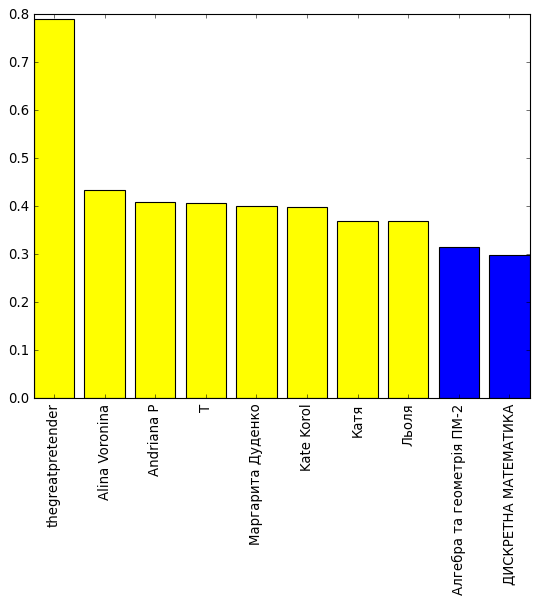

In [314]:
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='white')
pl_positive['colors'] = 'yellow'
pl_positive.loc[pl_positive.type == 'Group','colors'] = 'b'
ax.bar(pl_positive.name, pl_positive.result, color=pl_positive.colors)
plt.xticks(rotation=90)
plt.show()

In [291]:
final_negative = final_merged.sort_values(['result'], ascending=[True])
final_negative = final_negative.drop_duplicates(subset ="dialog_id",keep = 'first')
pl_negative = final_negative.head(10)
pl_negative

,dialog_id,sentiment,result,count,name,type,users
2752,674447504,0.0000,-0.500000,2,Anastasiia,Private dialog,"{'user_id': 674447504, 'first_name': 'Anastasi..."
2751,406783127,0.0000,-0.333333,3,wmorgun,Private dialog,"{'user_id': 406783127, 'first_name': 'wmorgun'..."
2750,544701196,0.0000,-0.250000,4,Ярослав Шелемей,Private dialog,"{'user_id': 544701196, 'first_name': 'Ярослав'..."
2749,831915662,0.0000,-0.100000,10,Ольга Синюк,Private dialog,"{'user_id': 831915662, 'first_name': 'Ольга', ..."
2748,1092277326,-0.3751,-0.093775,4,Николай,Private dialog,"{'user_id': 1092277326, 'first_name': 'Николай..."
2747,-1001761570307,0.0000,-0.090909,11,стаді,Channel,"{'user_id': 559072245, 'first_name': 'Катя', '..."
2746,-1001522361915,0.0000,-0.083333,12,Lou,Channel,"{'user_id': 559072245, 'first_name': 'Катя', '..."
2745,457892070,0.0000,-0.076923,13,Instaphoto,Private dialog,"{'user_id': 457892070, 'first_name': 'Instapho..."
2744,-385830320,0.0000,-0.062500,16,Marketing💥,Group,"{'user_id': 436745155, 'first_name': 'Катя', '..."
2737,-1001532166386,0.0000,-0.035714,28,Hazza,Channel,"{'user_id': 559072245, 'first_name': 'Катя', '..."


### Top-10 dialogs with the most negative sentiment

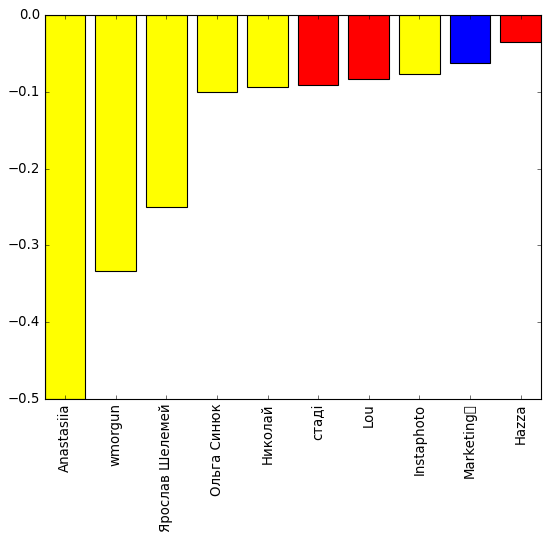

In [303]:
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='white')
pl_negative['colors'] = 'b'
pl_negative.loc[pl_negative.type == 'Private dialog','colors'] = 'yellow'
pl_negative.loc[pl_negative.type == 'Channel','colors'] = 'r'
ax.bar(pl_negative.name, pl_negative.result, color=pl_negative.colors)
plt.xticks(rotation=90)
plt.show()